# ***Membership Churn Prediction: Leveraging Statistical Analysis to Identify Potential Cancellations***

# P. Ridhanya (RA2011026020104)

### *Data collection*

In [1]:
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [2]:
# loading the dataset
data = pd.read_excel(r"/content/data.xlsx")

In [ ]:
# Defining header
data.head(10)

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
0,A00001,29,113125.0,M,M,25200000.0,1.0,TYPE-B,45,2,ANNUAL,477,INFORCE,20060914,NaN
1,A00002,38,112220.0,M,M,10339200.0,1.0,TYPE-B,36,3,QUARTERLY,255,INFORCE,20061102,NaN
2,A00003,12,100000.0,M,M,14400000.0,1.0,TYPE-B,42,1,ANNUAL,7866,INFORCE,20070124,NaN
3,A00004,12,100000.0,M,M,9000000.0,1.0,TYPE-B,39,2,ANNUAL,200533,INFORCE,20070122,NaN
4,A00005,46,100000.0,M,M,4800000.0,1.0,TYPE-B,27,2,QUARTERLY,6988,INFORCE,20070131,NaN
5,A00006,12,110000.0,NaN,NaN,NaN,1.0,TYPE-B,48,3,ANNUAL,5311,INFORCE,20070215,NaN
6,A00007,36,100000.0,M,M,24000000.0,1.0,TYPE-B,39,2,ANNUAL,4055,INFORCE,20070221,NaN
7,A00008,12,120000.0,M,M,3600000.0,1.0,TYPE-B,28,1,QUARTERLY,13100,CANCELLED,20070312,20090811.0
8,A00009,35,120000.0,NaN,NaN,NaN,1.0,TYPE-B,35,2,MONTHLY,4522,INFORCE,20070316,NaN
9,A00010,33,102700.0,M,M,14400000.0,1.0,TYPE-B,42,2,SEMI-ANNUAL,11266,INFORCE,20070330,NaN


In [3]:
# defining data shape
data.shape

(10362, 15)

In [4]:
# defining data types
data.dtypes

MEMBERSHIP_NUMBER         object
MEMBERSHIP_TERM_YEARS      int64
ANNUAL_FEES              float64
MEMBER_MARITAL_STATUS     object
MEMBER_GENDER             object
MEMBER_ANNUAL_INCOME     float64
MEMBER_OCCUPATION_CD     float64
MEMBERSHIP_PACKAGE        object
MEMBER_AGE_AT_ISSUE        int64
ADDITIONAL_MEMBERS         int64
PAYMENT_MODE              object
AGENT_CODE                object
MEMBERSHIP_STATUS         object
START_DATE (YYYYMMDD)      int64
END_DATE  (YYYYMMDD)     float64
dtype: object

In [ ]:
# defining data description
data.describe()

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
count,10362.000000,1.036200e+04,8.608000e+03,10319.000000,10362.000000,10362.000000,1.036200e+04,3.143000e+03
mean,29.395001,1.788122e+05,1.451100e+06,1.711019,46.798494,1.412276,2.010828e+07,2.011390e+07
std,22.427712,2.688747e+05,1.757174e+07,1.453960,13.897085,1.145136,1.719666e+04,1.378483e+04
min,9.000000,0.000000e+00,9.996000e+03,1.000000,0.000000,0.000000,2.006091e+07,2.007083e+07
25%,12.000000,1.000000e+05,3.999960e+05,1.000000,37.000000,0.000000,2.009123e+07,2.010122e+07
50%,19.000000,1.182093e+05,5.499960e+05,1.000000,46.000000,1.000000,2.010123e+07,2.011113e+07
75%,37.000000,1.900000e+05,9.999960e+05,2.000000,57.000000,2.000000,2.012123e+07,2.013012e+07
max,102.000000,1.010000e+07,1.000000e+09,6.000000,92.000000,3.000000,2.013113e+07,2.013112e+07


In [ ]:
data.head(10362)

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE (YYYYMMDD),END_DATE (YYYYMMDD)
0,A00001,29,113125.00,M,M,25200000.0,1.0,TYPE-B,45,2,ANNUAL,477,INFORCE,20060914,NaN
1,A00002,38,112220.00,M,M,10339200.0,1.0,TYPE-B,36,3,QUARTERLY,255,INFORCE,20061102,NaN
2,A00003,12,100000.00,M,M,14400000.0,1.0,TYPE-B,42,1,ANNUAL,7866,INFORCE,20070124,NaN
3,A00004,12,100000.00,M,M,9000000.0,1.0,TYPE-B,39,2,ANNUAL,200533,INFORCE,20070122,NaN
4,A00005,46,100000.00,M,M,4800000.0,1.0,TYPE-B,27,2,QUARTERLY,6988,INFORCE,20070131,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10357,A10362,17,206180.15,NaN,M,NaN,6.0,TYPE-A,71,0,ANNUAL,1438477,INFORCE,20131129,NaN
10358,A10363,22,100000.42,NaN,F,399996.0,2.0,TYPE-A,63,0,ANNUAL,1288288,INFORCE,20131129,NaN
10359,A10364,17,270950.45,NaN,M,NaN,6.0,TYPE-A,62,3,ANNUAL,1244022,INFORCE,20131129,NaN
10360,A10365,57,210006.61,NaN,M,NaN,6.0,TYPE-A,72,2,ANNUAL,1436000,INFORCE,20131129,NaN


from matplotlib import pyplot as plt
_df_0['MEMBERSHIP_TERM_YEARS'].plot(kind='hist', bins=20, title='MEMBERSHIP_TERM_YEARS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['ANNUAL_FEES'].plot(kind='hist', bins=20, title='ANNUAL_FEES')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['MEMBER_ANNUAL_INCOME'].plot(kind='hist', bins=20, title='MEMBER_ANNUAL_INCOME')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['MEMBER_OCCUPATION_CD'].plot(kind='hist', bins=20, title='MEMBER_OCCUPATION_CD')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('MEMBER_MARITAL_STATUS').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('MEMBER_GENDER').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('MEMBERSHIP_PACKAGE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('PAYMENT_MODE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='MEMBERSHIP_TERM_YEARS', y='ANNUAL_FEES', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='ANNUAL_FEES', y='MEMBER_ANNUAL_INCOME', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='MEMBER_ANNUAL_INCOME', y='MEMBER_OCCUPATION_CD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='MEMBER_OCCUPATION_CD', y='MEMBER_AGE_AT_ISSUE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['MEMBERSHIP_TERM_YEARS'].plot(kind='line', figsize=(8, 4), title='MEMBERSHIP_TERM_YEARS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['ANNUAL_FEES'].plot(kind='line', figsize=(8, 4), title='ANNUAL_FEES')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['MEMBER_ANNUAL_INCOME'].plot(kind='line', figsize=(8, 4), title='MEMBER_ANNUAL_INCOME')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['MEMBER_OCCUPATION_CD'].plot(kind='line', figsize=(8, 4), title='MEMBER_OCCUPATION_CD')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['MEMBER_GENDER'].value_counts()
    for x_label, grp in _df_16.groupby('MEMBER_MARITAL_STATUS')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MEMBER_MARITAL_STATUS')
_ = plt.ylabel('MEMBER_GENDER')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['MEMBERSHIP_PACKAGE'].value_counts()
    for x_label, grp in _df_17.groupby('MEMBER_GENDER')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MEMBER_GENDER')
_ = plt.ylabel('MEMBERSHIP_PACKAGE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['PAYMENT_MODE'].value_counts()
    for x_label, grp in _df_18.groupby('MEMBERSHIP_PACKAGE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MEMBERSHIP_PACKAGE')
_ = plt.ylabel('PAYMENT_MODE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['MEMBERSHIP_STATUS'].value_counts()
    for x_label, grp in _df_19.groupby('PAYMENT_MODE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('PAYMENT_MODE')
_ = plt.ylabel('MEMBERSHIP_STATUS')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['MEMBER_MARITAL_STATUS'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='MEMBERSHIP_TERM_YEARS', y='MEMBER_MARITAL_STATUS', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['MEMBER_GENDER'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='MEMBERSHIP_TERM_YEARS', y='MEMBER_GENDER', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['MEMBERSHIP_PACKAGE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='MEMBERSHIP_TERM_YEARS', y='MEMBERSHIP_PACKAGE', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['PAYMENT_MODE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='MEMBERSHIP_TERM_YEARS', y='PAYMENT_MODE', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## *Data visualization and analysis*

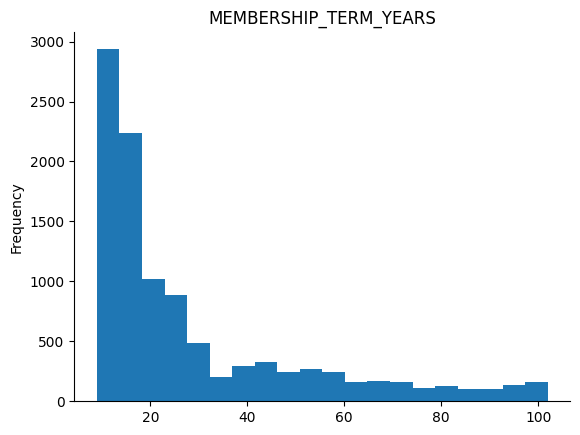

In [ ]:
# plotting graph for membership term years
_df_0['MEMBERSHIP_TERM_YEARS'].plot(kind='hist', bins=20, title='MEMBERSHIP_TERM_YEARS')
plt.gca().spines[['top', 'right',]].set_visible(False)

INFERENCE: Many people are starting the membership,but as time passess many tend to cancel

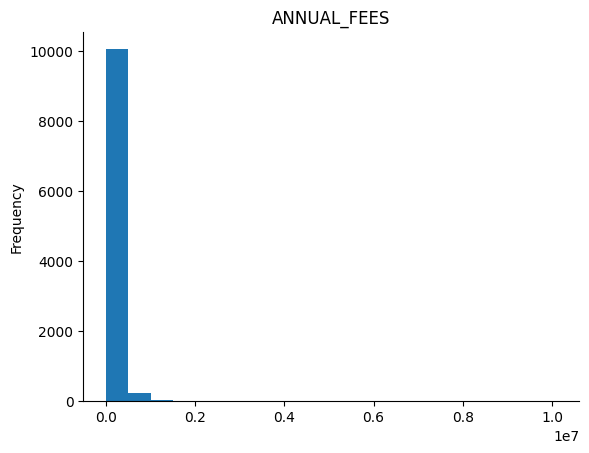

In [ ]:
# plotting graph for annual fee
_df_1['ANNUAL_FEES'].plot(kind='hist', bins=20, title='ANNUAL_FEES')
plt.gca().spines[['top', 'right',]].set_visible(False)

INFERENCE: There is a drastic variation range change in annual fee

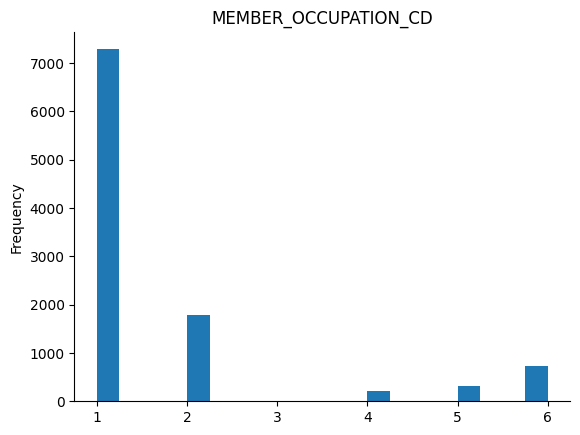

In [ ]:
# plotting graph for member occupation cd
_df_3['MEMBER_OCCUPATION_CD'].plot(kind='hist', bins=20, title='MEMBER_OCCUPATION_CD')
plt.gca().spines[['top', 'right',]].set_visible(False)

INFERENCE: The customer distribution based on occupation shows that member occupation of type 1 is distinctively higher than the rest

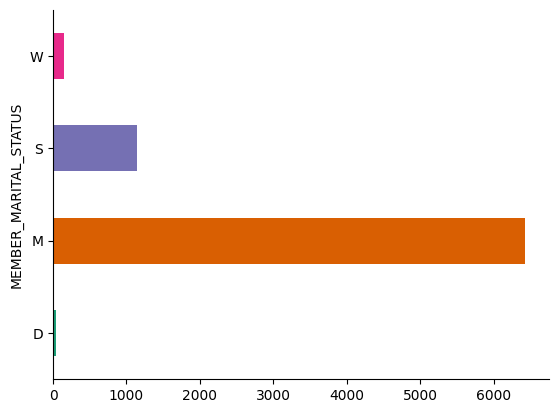

In [ ]:
# plotting graph for marital status
_df_4.groupby('MEMBER_MARITAL_STATUS').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

INFERENCE: From the given set of customers, majority are married and few are single and very less from other categories

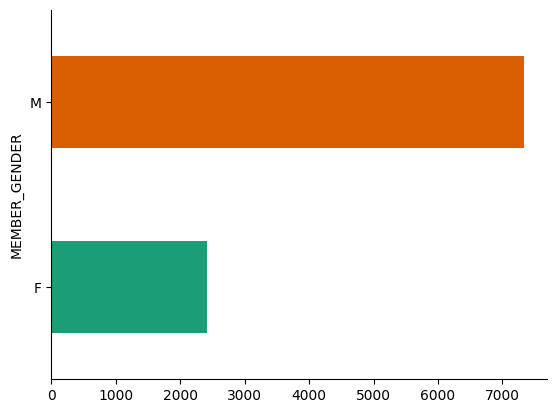

In [ ]:
# plotting graph for gender
_df_5.groupby('MEMBER_GENDER').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

INFERENCE: There appears to be more male in the customers than females

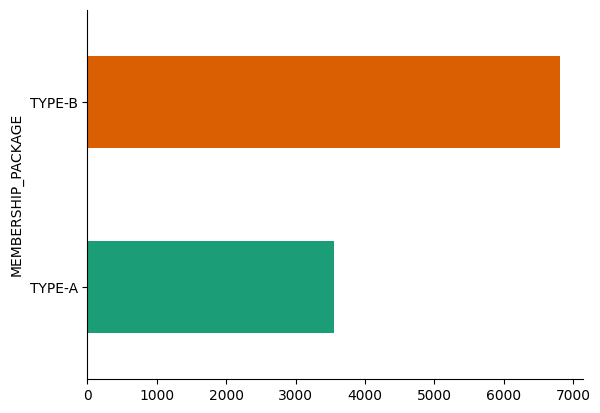

In [ ]:
#plotting graph for membership type
_df_6.groupby('MEMBERSHIP_PACKAGE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

INFERENCE: TYPE-B membership is more used than TYPE A

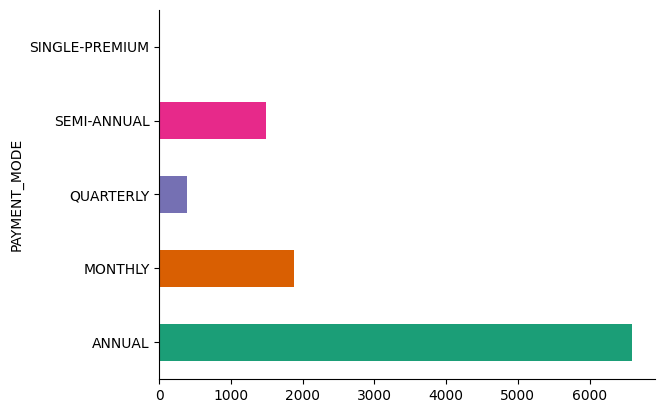

In [ ]:
#plotting graph for payment mode
_df_7.groupby('PAYMENT_MODE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

INFERENCE: Annual payment mode tends to be more preferred than the rest

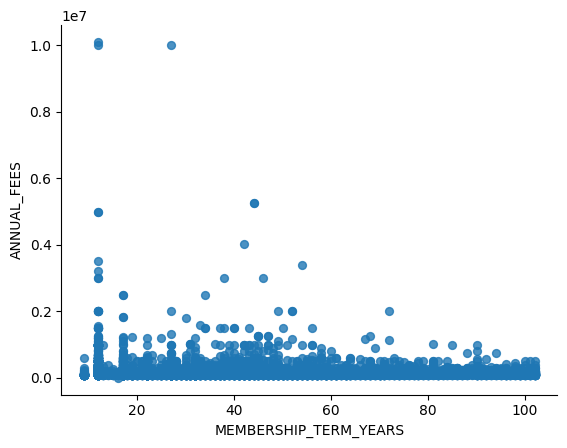

In [ ]:
# plotting scatterplot between membership term years and annual fee
_df_8.plot(kind='scatter', x='MEMBERSHIP_TERM_YEARS', y='ANNUAL_FEES', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

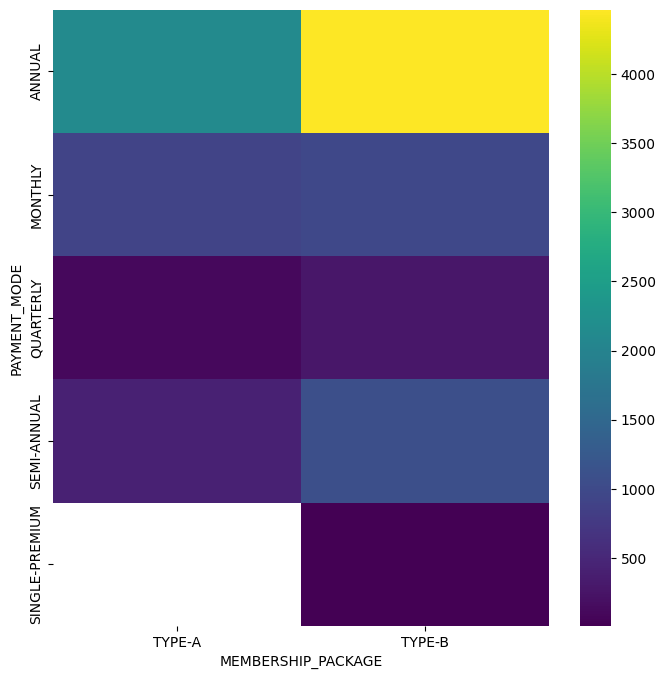

In [ ]:
# generating heatmap for payment mode and membership package
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['PAYMENT_MODE'].value_counts()
    for x_label, grp in _df_18.groupby('MEMBERSHIP_PACKAGE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MEMBERSHIP_PACKAGE')
_ = plt.ylabel('PAYMENT_MODE')

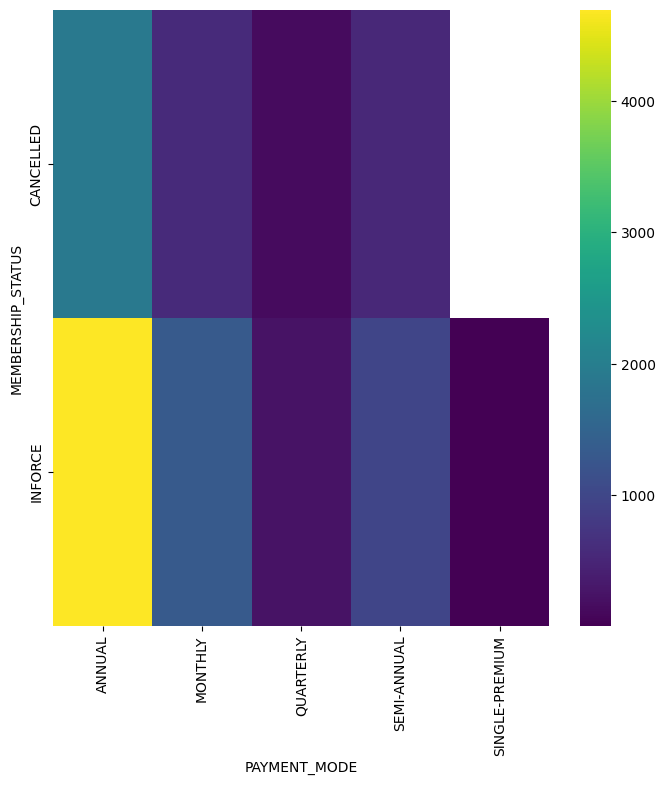

In [ ]:
# heatmap between membership status and payment mode
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['MEMBERSHIP_STATUS'].value_counts()
    for x_label, grp in _df_19.groupby('PAYMENT_MODE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('PAYMENT_MODE')
_ = plt.ylabel('MEMBERSHIP_STATUS')

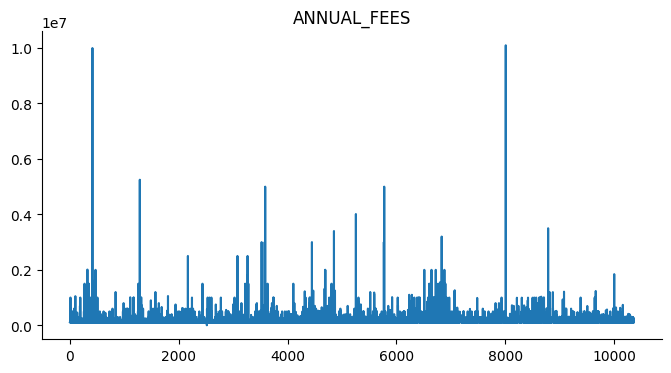

In [ ]:
# line chart for annual fee
_df_13['ANNUAL_FEES'].plot(kind='line', figsize=(8, 4), title='ANNUAL_FEES')
plt.gca().spines[['top', 'right']].set_visible(False)

The fees are customized for every member's preference and not cancelled logically

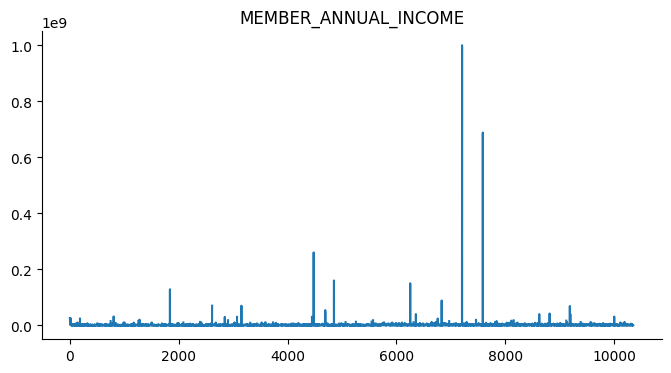

In [ ]:
# plotting line chart for annual income
_df_14['MEMBER_ANNUAL_INCOME'].plot(kind='line', figsize=(8, 4), title='MEMBER_ANNUAL_INCOME')
plt.gca().spines[['top', 'right']].set_visible(False)

 Income status tends to get higher as the values increases

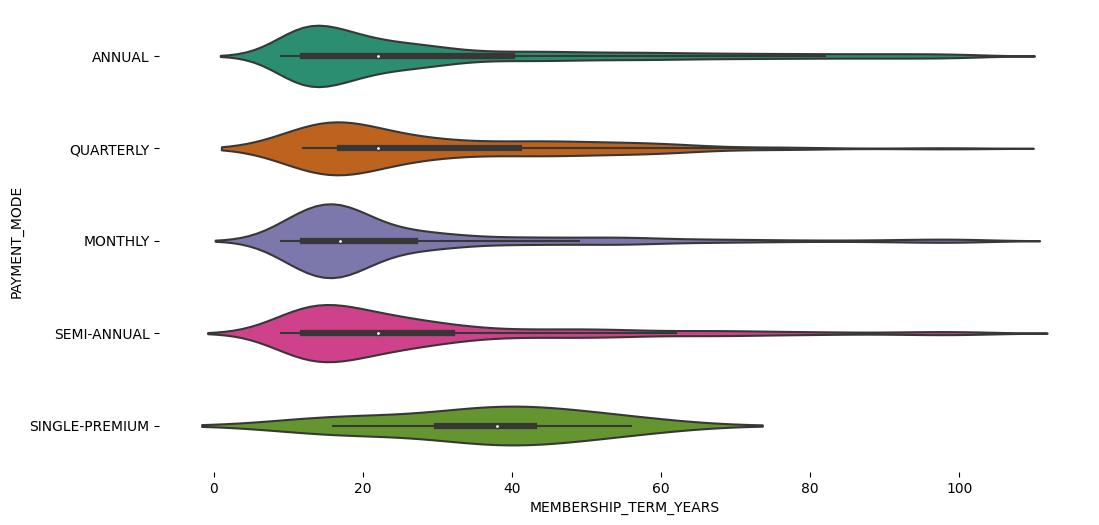

In [ ]:
## violin plot between membership term years and payment mode
figsize = (12, 1.2 * len(_df_23['PAYMENT_MODE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='MEMBERSHIP_TERM_YEARS', y='PAYMENT_MODE', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-26-6dd13ac8e5bc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data['MEMBER_AGE_AT_ISSUE'])


<Axes: xlabel='MEMBER_AGE_AT_ISSUE', ylabel='Density'>

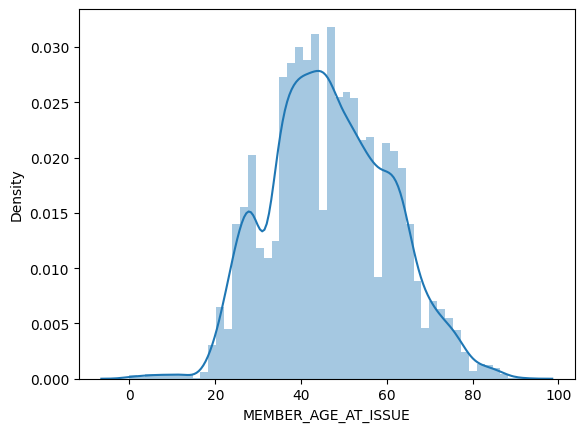

In [ ]:
sns.distplot( data['MEMBER_AGE_AT_ISSUE'])

INFERENCE: Middle aged people are more likely to enroll for membership

## *Data preprocessing and model evaluation*

In [5]:
#removing unwanted columns
columns_to_drop = ['MEMBERSHIP_NUMBER', 'MEMBER_MARITAL_STATUS', 'MEMBER_GENDER', 'MEMBER_OCCUPATION_CD', 'ADDITIONAL_MEMBERS', 'AGENT_CODE', 'START_DATE (YYYYMMDD)', 'END_DATE  (YYYYMMDD)']

data = data.drop(columns=columns_to_drop, axis=1)

In [6]:
# Map 'PAYMENT_MODE' to numeric values(mapping categorical variables to numerical value)
payment_mode_mapping = {
    'ANNUAL': 0,
    'QUARTERLY': 1,
    'MONTHLY': 2,
    'SEMI-ANNUAL': 3,
    'SINGLE-PREMIUM': 4
}

data['PAYMENT_MODE'] = data['PAYMENT_MODE'].map(payment_mode_mapping)

# Map 'MEMBERSHIP_PACKAGE' to numeric values
membership_package_mapping = {
    'TYPE-A': 0,
    'TYPE-B': 1
}

data['MEMBERSHIP_PACKAGE'] = data['MEMBERSHIP_PACKAGE'].map(membership_package_mapping)

In [7]:
# Define features and target variable
X = data.drop('MEMBERSHIP_STATUS', axis=1)
y = (data['MEMBERSHIP_STATUS'] == 'CANCELLED').astype(int)

In [8]:
missing_values = X.isnull().sum()
print(missing_values)

MEMBERSHIP_TERM_YEARS       0
ANNUAL_FEES                 0
MEMBER_ANNUAL_INCOME     1754
MEMBERSHIP_PACKAGE          0
MEMBER_AGE_AT_ISSUE         0
PAYMENT_MODE                0
dtype: int64


In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [10]:
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='mean')

# Apply imputation to the column
X['MEMBER_ANNUAL_INCOME'] = imputer.fit_transform(X[['MEMBER_ANNUAL_INCOME']])

In [11]:
# Drop rows with missing values
X = X.dropna(subset=['MEMBER_ANNUAL_INCOME'])

In [12]:
missing_values = X.isnull().sum()
print(missing_values)

MEMBERSHIP_TERM_YEARS    0
ANNUAL_FEES              0
MEMBER_ANNUAL_INCOME     0
MEMBERSHIP_PACKAGE       0
MEMBER_AGE_AT_ISSUE      0
PAYMENT_MODE             0
dtype: int64


## *Training and testing*

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Assuming you have already defined X_train and y_train
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
lr_model = LogisticRegression()

In [15]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred = lr_model.predict(X_test)


In [17]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [18]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.70      1.00      0.82      1453
           1       0.00      0.00      0.00       620

    accuracy                           0.70      2073
   macro avg       0.35      0.50      0.41      2073
weighted avg       0.49      0.70      0.58      2073



In [20]:
# confusion matrix
array = confusion_matrix(y_test, y_pred)
array

array([[1452,    1],
       [ 620,    0]])

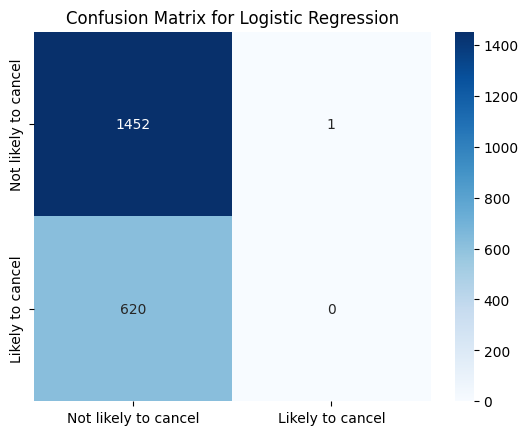

In [21]:
# Class labels
classes = ['Not likely to cancel', 'Likely to cancel']

# Create DataFrame
df_cm = pd.DataFrame(array, index=classes, columns=classes)

# Plot the heatmap
plt.figure()
sns.heatmap(df_cm, annot=True, fmt=".0f", cmap="Blues")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [22]:
#Creating a svm model
from sklearn.svm import LinearSVC

In [25]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [26]:
print(y_pred)

[1 1 1 ... 1 1 1]


In [27]:
y_pred = svm_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.98      0.82      1453
           1       0.12      0.00      0.01       620

    accuracy                           0.69      2073
   macro avg       0.41      0.49      0.41      2073
weighted avg       0.52      0.69      0.58      2073



In [28]:
#confusion matrix
array = confusion_matrix(y_test, y_pred)
array

array([[1430,   23],
       [ 617,    3]])

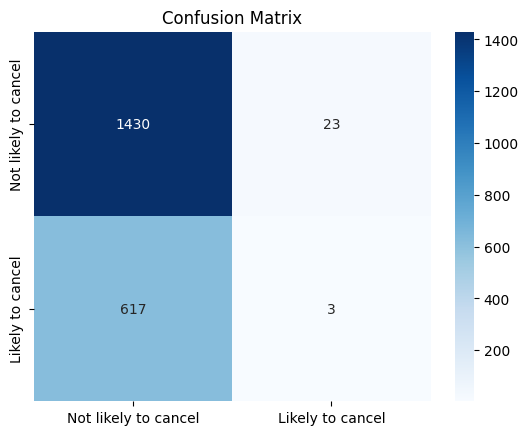

In [29]:
# Class labels
classes = ['Not likely to cancel', 'Likely to cancel']

# Create DataFrame
df_cm = pd.DataFrame(array, index=classes, columns=classes)

# Plot the heatmap
plt.figure()
sns.heatmap(df_cm, annot=True, fmt=".0f", cmap="Blues")
plt.title('Confusion Matrix')
plt.show()

In [30]:
#creating a decision tree classifier model
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [32]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [33]:
y_pred = dt_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1453
           1       0.41      0.44      0.42       620

    accuracy                           0.64      2073
   macro avg       0.58      0.58      0.58      2073
weighted avg       0.65      0.64      0.65      2073



In [34]:
#confusion matrix
array = confusion_matrix(y_test, y_pred)
array

array([[1064,  389],
       [ 350,  270]])

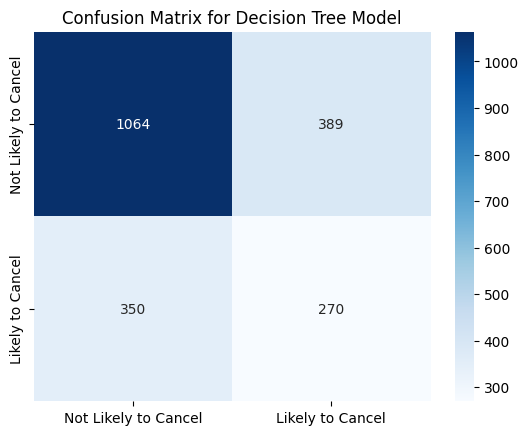

In [35]:

# Class labels
classes = ['Not Likely to Cancel', 'Likely to Cancel']

# Create DataFrame
df_cm = pd.DataFrame(array, index=classes, columns=classes)

# Plot the heatmap
plt.figure()
sns.heatmap(df_cm, annot=True, fmt=".0f", cmap="Blues")
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

In [36]:
# Creating a gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [38]:
y_pred = gb_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.94      0.82      1453
           1       0.53      0.17      0.26       620

    accuracy                           0.71      2073
   macro avg       0.63      0.55      0.54      2073
weighted avg       0.67      0.71      0.65      2073



In [39]:
print(y_pred)

[1 0 0 ... 0 0 0]


In [40]:
#confusion matrix
array = confusion_matrix(y_test, y_pred)
array

array([[1360,   93],
       [ 514,  106]])

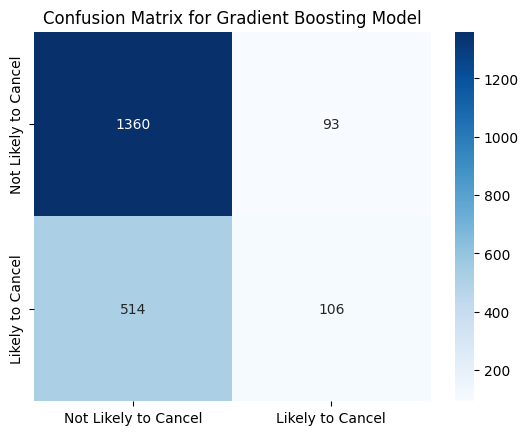

In [41]:
# Class labels
classes = ['Not Likely to Cancel', 'Likely to Cancel']

# Create DataFrame
df_cm = pd.DataFrame(array, index=classes, columns=classes)

# Plot the heatmap
plt.figure()
sns.heatmap(df_cm, annot=True, fmt=".0f", cmap="Blues")
plt.title('Confusion Matrix for Gradient Boosting Model')
plt.show()

In [42]:
# Creating a xgboost model
from xgboost import XGBClassifier

In [43]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
print(y_pred)

[1 0 0 ... 0 0 0]


In [45]:
y_pred = xgb_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81      1453
           1       0.52      0.31      0.39       620

    accuracy                           0.71      2073
   macro avg       0.63      0.59      0.60      2073
weighted avg       0.68      0.71      0.68      2073



In [ ]:
#confusion matrix
array = confusion_matrix(y_test, y_pred)
array

array([[1273,  180],
       [ 428,  192]])

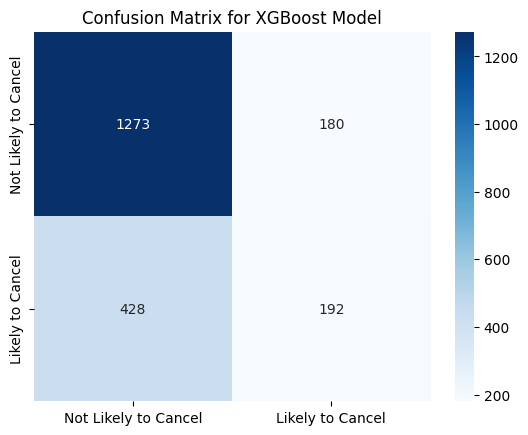

In [ ]:
# Class labels
classes = ['Not Likely to Cancel', 'Likely to Cancel']

# Create DataFrame
df_cm = pd.DataFrame(array, index=classes, columns=classes)

# Plot the heatmap
plt.figure()
sns.heatmap(df_cm, annot=True, fmt=".0f", cmap="Blues")
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

In [46]:
# Creating a Randomforest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
y_pred = rf_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1453
           1       0.48      0.35      0.41       620

    accuracy                           0.69      2073
   macro avg       0.61      0.59      0.60      2073
weighted avg       0.67      0.69      0.68      2073



In [48]:
print(y_pred)

[1 0 1 ... 0 0 0]


In [ ]:
#confusion matrix
array = confusion_matrix(y_test, y_pred)
array

array([[1205,  248],
       [ 396,  224]])

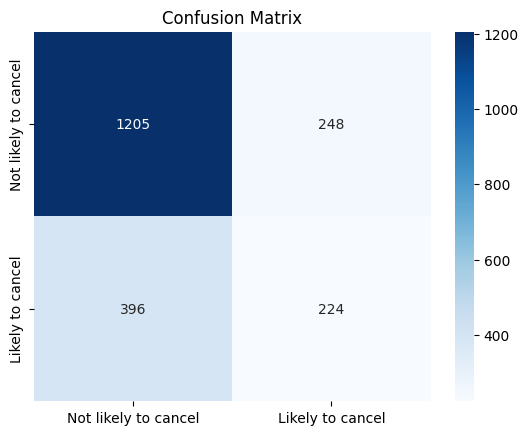

In [ ]:
classes = ['Not likely to cancel', 'Likely to cancel']

# Create DataFrame
df_cm = pd.DataFrame(array, index=classes, columns=classes)

# Plot the heatmap
plt.figure()
sns.heatmap(df_cm, annot=True, fmt=".0f", cmap="Blues")
plt.title('Confusion Matrix')
plt.show()

In [49]:
# Creating a catboost model
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


ModuleNotFoundError: ignored

In [50]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.0 MB/s eta 0:00:00


In [51]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [52]:
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)

Learning rate set to 0.025418
0:	learn: 0.6864273	total: 50.1ms	remaining: 50s
1:	learn: 0.6792072	total: 52.8ms	remaining: 26.4s
2:	learn: 0.6731282	total: 55.9ms	remaining: 18.6s
3:	learn: 0.6682687	total: 58.1ms	remaining: 14.5s
4:	learn: 0.6633229	total: 60.3ms	remaining: 12s
5:	learn: 0.6583081	total: 63.5ms	remaining: 10.5s
6:	learn: 0.6532114	total: 66.4ms	remaining: 9.43s
7:	learn: 0.6484587	total: 68.9ms	remaining: 8.55s
8:	learn: 0.6441940	total: 71.6ms	remaining: 7.88s
9:	learn: 0.6403465	total: 74.6ms	remaining: 7.38s
10:	learn: 0.6365044	total: 77.7ms	remaining: 6.99s
11:	learn: 0.6324412	total: 80.7ms	remaining: 6.65s
12:	learn: 0.6291993	total: 83.4ms	remaining: 6.33s
13:	learn: 0.6261584	total: 86.6ms	remaining: 6.1s
14:	learn: 0.6228986	total: 89.5ms	remaining: 5.88s
15:	learn: 0.6204109	total: 92.1ms	remaining: 5.67s
16:	learn: 0.6173044	total: 95.4ms	remaining: 5.52s
17:	learn: 0.6146220	total: 98ms	remaining: 5.34s
18:	learn: 0.6120815	total: 101ms	remaining: 5.21s


In [53]:
y_pred = catboost_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.92      0.82      1453
           1       0.57      0.23      0.33       620

    accuracy                           0.72      2073
   macro avg       0.65      0.58      0.58      2073
weighted avg       0.69      0.72      0.67      2073



In [54]:
print(y_pred)

[1 0 0 ... 0 0 0]


In [55]:
#confusion matrix
array = confusion_matrix(y_test, y_pred)
array

array([[1344,  109],
       [ 476,  144]])

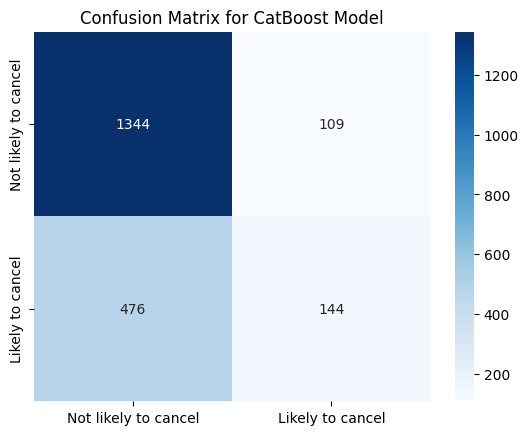

In [ ]:
# Class labels
classes = ['Not likely to cancel', 'Likely to cancel']

# Create DataFrame
df_cm = pd.DataFrame(array, index=classes, columns=classes)

# Plot the heatmap
plt.figure()
sns.heatmap(df_cm, annot=True, fmt=".0f", cmap="Blues")
plt.title('Confusion Matrix for CatBoost Model')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
xgb_model = XGBClassifier()

In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)


In [ ]:
# Fit the model with the training data
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:18:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
# Get the best model
best_rf_model = grid_search.best_estimator_

In [ ]:
# Scoring the model with the test data
y_pred = best_rf_model.predict(X_test)
y_prob = best_rf_model.predict_proba(X_test)[:, 1]



In [ ]:
# Calculate AUC
roc_auc = roc_auc_score(y_test, y_prob)

AUC: 0.6920958861532313


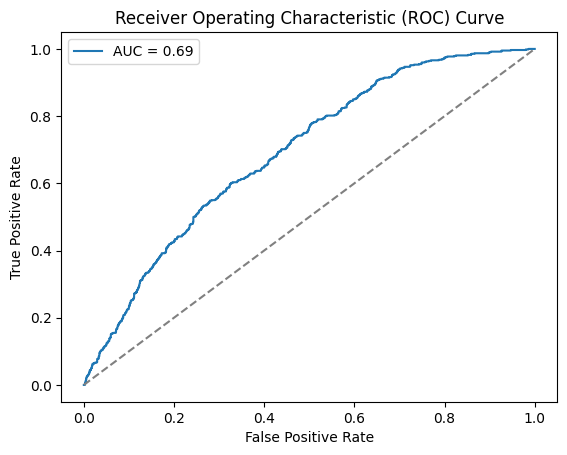

In [ ]:
# Display AUC and plot ROC Curve
print(f"AUC: {roc_auc}")
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

The code begins with exploratory data analysis and preprocessing, handling tasks like missing values and encoding categorical variables. It then splits the data into training and test sets. To address the membership cancellation prediction, it utilizes a range of models, including Random Forest, Logistic Regression, Support Vector Machine (SVM), Gradient Boosting, XGBoost, and CatBoost.

For XGBoost, the code performs hyperparameter tuning using GridSearchCV to optimize parameters like the number of estimators, learning rate, and maximum depth. The best hyperparameters are identified and reported.

The CatBoost model, which showed the highest accuracy among the tested models (72%), is utilized. The code evaluates its performance using a confusion matrix, providing insights into the model's predictive capabilities.

Additionally, the code calculates the Area Under the Curve (AUC) for the XGBoost model and plots the Receiver Operating Characteristic (ROC) curve. This visualization aids in assessing the model's ability to discriminate between positive and negative instances.

The final section of the code includes additional information, such as displaying the best hyperparameters for XGBoost, reporting model scores for all tested models, and any other relevant insights or observations.

Overall, the code offers a comprehensive approach to membership cancellation prediction, encompassing model selection, hyperparameter tuning, and performance evaluation, with a focus on understanding the strengths of the CatBoost model and the optimized XGBoost model.